In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import glob
import plotly.io as pio

In [2]:
import plotly

print(f'pandas version: {pd.__version__}')
print(f'plotly version: {plotly.__version__}')

pandas version: 2.1.2
plotly version: 5.24.1


In [3]:
pio.templates['sans_serif'] = go.layout.Template(dict(    
    layout=go.Layout(
           font_family='Helvetica, Inter, Arial, sans-serif',
    ),
))

pio.templates.default = "simple_white+sans_serif"

In [4]:
glob.glob('*.csv')

['iphone-galaxy-specs.csv']

In [5]:
df = pd.read_csv('iphone-galaxy-specs.csv')
df.head(3)

,Product,Generation,Available Space (GB),RAM (GB),Release Date,US Discontinued Date,Display Size,Screen Resolution,Height (mm),Width (mm),Depth (mm),Weight (grams),Rear Camera,Ultra Wide,Telephoto,Battery Capacity (mAh)
0,iPhone (1st generation),1,4,0.128,06/29/2007,7/15/2008,3.5,320×480,115.1,61.0,11.6,135,Single,False,False,1400
1,iPhone 3G,2,8,0.128,07/11/2008,6/7/2010,3.5,480×320,115.5,62.1,12.3,135,Single,False,False,1150
2,iPhone 3GS,3,8,0.256,06/19/2009,9/12/2012,3.5,480×320,115.5,62.1,12.3,135,Single,False,False,1120


In [6]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [7]:
df['Manufacturer'] = np.nan
df['Manufacturer'] = df['Manufacturer'].astype('str')
df.loc[df['Product'].str.contains('iPhone'), 'Manufacturer'] = 'Apple'
df.loc[df['Product'].str.contains('Galaxy'), 'Manufacturer'] = 'Samsung'

df[['Product', 'Manufacturer']].head()

,Product,Manufacturer
0,iPhone (1st generation),Apple
1,iPhone 3G,Apple
2,iPhone 3GS,Apple
3,iPhone 4,Apple
4,iPhone 4s,Apple


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Product                 33 non-null     object        
 1   Generation              33 non-null     int64         
 2   Available Space (GB)    33 non-null     int64         
 3   RAM (GB)                33 non-null     float64       
 4   Release Date            33 non-null     datetime64[ns]
 5   US Discontinued Date    25 non-null     object        
 6   Display Size            33 non-null     float64       
 7   Screen Resolution       33 non-null     object        
 8   Height (mm)             33 non-null     float64       
 9   Width (mm)              33 non-null     float64       
 10  Depth (mm)              33 non-null     float64       
 11  Weight (grams)          33 non-null     int64         
 12  Rear Camera             33 non-null     object      

In [20]:
plotly_color_map = {
    'Samsung': 'blue',
    'Apple': '#A2AAAD',
}

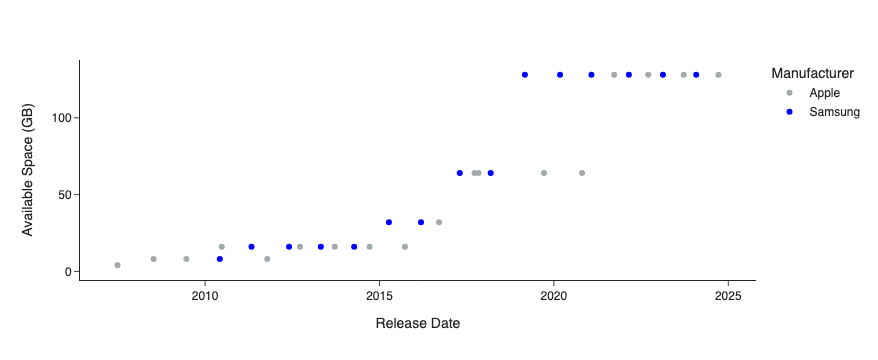

In [22]:
fig = px.scatter(
    df,
    x='Release Date',
    y='Available Space (GB)',
    color='Manufacturer',
    color_discrete_map=plotly_color_map,
)

fig.show()

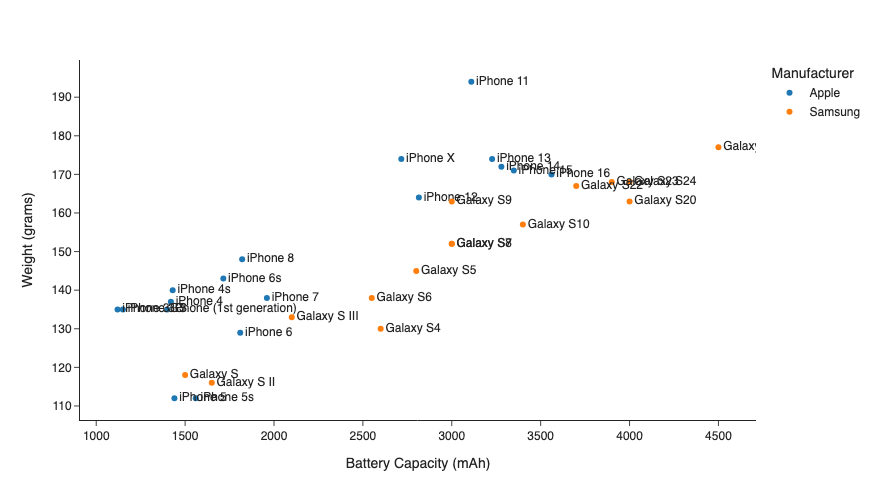

In [18]:
fig = px.scatter(
    df,
    x='Battery Capacity (mAh)',
    y='Weight (grams)',
    color='Manufacturer',
    text='Product',
    height=500,
)

fig.update_traces(textposition='middle right')


fig.show()

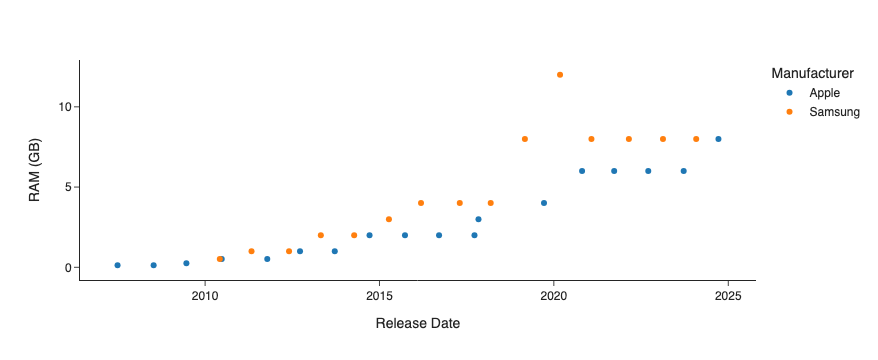

In [11]:
fig = px.scatter(
    df,
    x='Release Date',
    y='RAM (GB)',
    color='Manufacturer',
)

fig.show()

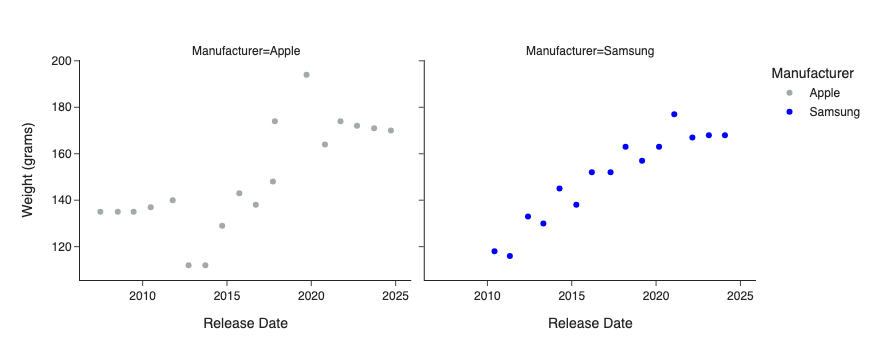

In [12]:
fig = px.scatter(
    df,
    x='Release Date',
    y='Weight (grams)',
    color='Manufacturer',
    facet_col='Manufacturer',
    color_discrete_map = {
        'Samsung': 'blue',
        'Apple': '#A2AAAD',
    }
)

fig.show()